In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS 

In [ ]:
data=pd.read_csv('...........................')
data.head()
dataset=data.iloc[:,1:].values

In [ ]:
dataset[0]

array(["RT @theskindoctor13: Shaheen Bagh is still on.\n\nMosques are open.\n\nMuIIahs are saying Corona won't harm if you read qalma.\n\nTiktokiye are m…",
       'Fri Mar 20 16:04:27 +0000 2020', 'Uttar Pradesh, India', 0.0],
      dtype=object)

In [ ]:
dataset.shape

(648958, 4)

In [ ]:
data1=[]
y=[]

In [ ]:
for i in range (0,648958):
  if(dataset[i][0][0]=='R' and dataset[i][0][1]=='T'):
    continue
  else:
    data1.append(dataset[i][0])
    y.append(dataset[i][3])


In [ ]:
len(y)

177546

In [ ]:
for i in range(0,177546):
  if(y[i]>0.0000000):
    y[i]=1
  else:
    y[i]=0

In [ ]:
len(data1)

177546

In [ ]:
set(y)

{0, 1}

In [ ]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


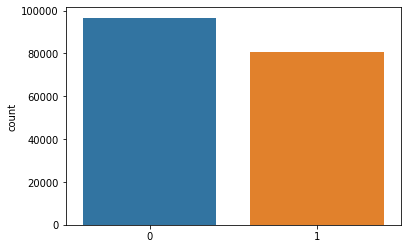

In [ ]:
sns.countplot(y)

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0,177546):
  review = re.sub('[^a-zA-Z]', ' ', data1[i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


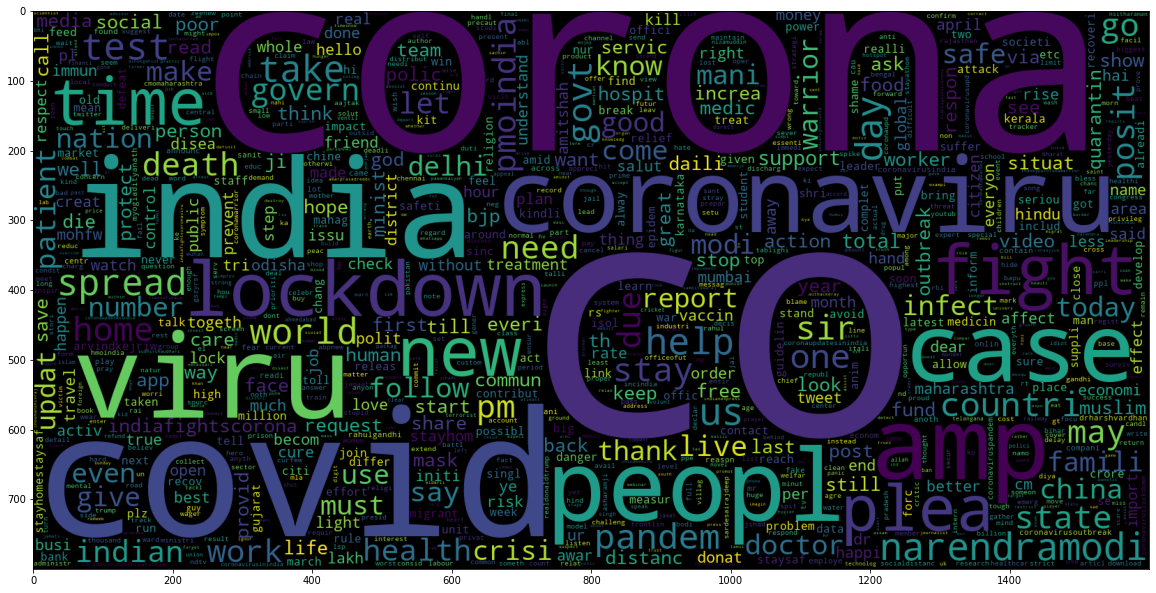

In [ ]:
data_neg = corpus[:]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 400)
x = cv.fit_transform(corpus).toarray()
#y = data.iloc[:, 0].values
 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.1, random_state = 0)


In [ ]:

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

[[9596  176]
 [ 563 7420]]


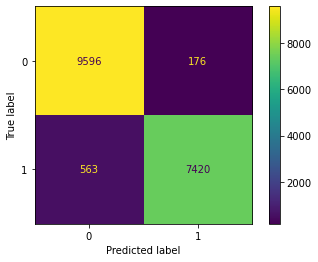

0.9583779217121937
0.9577432153124184
0.9607055350210743
0.9557322460043393
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      9772
           1       0.98      0.93      0.95      7983

    accuracy                           0.96     17755
   macro avg       0.96      0.96      0.96     17755
weighted avg       0.96      0.96      0.96     17755

0.9557322460043393


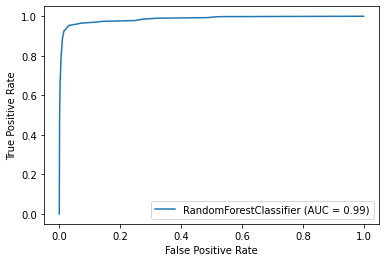

In [ ]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,accuracy_score ,f1_score, precision_score, recall_score,classification_report, plot_roc_curve,roc_auc_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
plot_confusion_matrix(classifier,x_test,y_test,values_format='d')
plt.show()
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred,average='macro'))
print(precision_score(y_test,y_pred,average='macro'))
print(recall_score(y_test,y_pred,average='macro'))
print(classification_report(y_test, y_pred))
print(roc_auc_score(y_test,y_pred,average='macro'))

plot_roc_curve(classifier,x_test,y_test)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression 
classifier1=LogisticRegression(random_state=0)
classifier1.fit(x_train, y_train) 
y_pred1=classifier1.predict(x_test)

[[8664 1108]
 [2474 5509]]


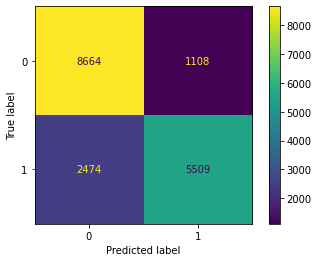

0.7982540129540975
0.79167596941884
0.8052150263040185
0.7883531310830438
              precision    recall  f1-score   support

           0       0.78      0.89      0.83      9772
           1       0.83      0.69      0.75      7983

    accuracy                           0.80     17755
   macro avg       0.81      0.79      0.79     17755
weighted avg       0.80      0.80      0.80     17755

0.7883531310830438


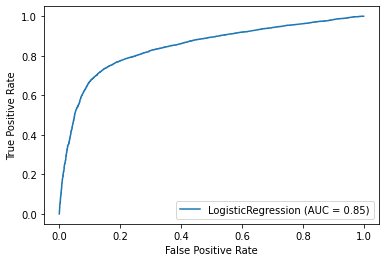

In [ ]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,accuracy_score ,f1_score, precision_score, recall_score,classification_report, plot_roc_curve,roc_auc_score
cm = confusion_matrix(y_test, y_pred1)
print(cm)
plot_confusion_matrix(classifier1,x_test,y_test,values_format='d')
plt.show()
print(accuracy_score(y_test, y_pred1))
print(f1_score(y_test, y_pred1,average='macro'))
print(precision_score(y_test,y_pred1,average='macro'))
print(recall_score(y_test,y_pred1,average='macro'))
print(classification_report(y_test, y_pred1))
print(roc_auc_score(y_test,y_pred1,average='macro'))

plot_roc_curve(classifier1,x_test,y_test)
plt.show()

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier2=MultinomialNB()
classifier2.fit(x_train, y_train)
y_pred2=classifier2.predict(x_test)

[[8244 1528]
 [2644 5339]]


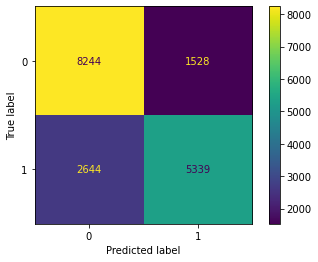

0.7650239369191777
0.7585605653175838
0.7673251899451604
0.756215533530652
              precision    recall  f1-score   support

           0       0.76      0.84      0.80      9772
           1       0.78      0.67      0.72      7983

    accuracy                           0.77     17755
   macro avg       0.77      0.76      0.76     17755
weighted avg       0.77      0.77      0.76     17755

0.756215533530652


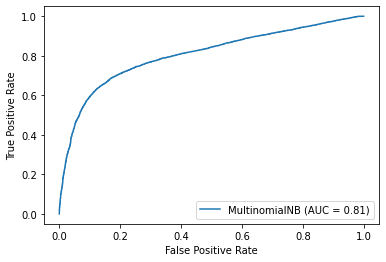

In [ ]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,accuracy_score ,f1_score, precision_score, recall_score,classification_report, plot_roc_curve,roc_auc_score
cm = confusion_matrix(y_test, y_pred2)
print(cm)
plot_confusion_matrix(classifier2,x_test,y_test,values_format='d')
plt.show()
print(accuracy_score(y_test, y_pred2))
print(f1_score(y_test, y_pred2,average='macro'))
print(precision_score(y_test,y_pred2,average='macro'))
print(recall_score(y_test,y_pred2,average='macro'))
print(classification_report(y_test, y_pred2))
print(roc_auc_score(y_test,y_pred2,average='macro'))

plot_roc_curve(classifier2,x_test,y_test)
plt.show()

In [ ]:
from sklearn.svm import LinearSVC 
classifier3=LinearSVC(random_state=42)
classifier3.fit(x_train, y_train)
y_pred3=classifier3.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[[8737 1035]
 [2575 5408]]


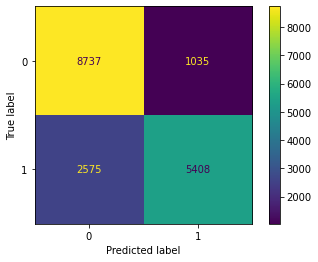

0.796676992396508
0.7892687500642759
0.8058630878747173
0.7857623501414104
              precision    recall  f1-score   support

           0       0.77      0.89      0.83      9772
           1       0.84      0.68      0.75      7983

    accuracy                           0.80     17755
   macro avg       0.81      0.79      0.79     17755
weighted avg       0.80      0.80      0.79     17755

0.7857623501414103


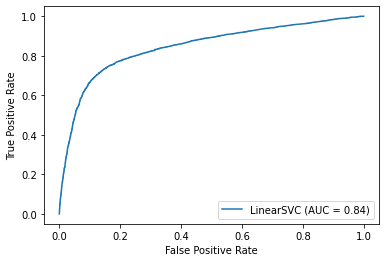

In [ ]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,accuracy_score ,f1_score, precision_score, recall_score,classification_report, plot_roc_curve,roc_auc_score
cm = confusion_matrix(y_test, y_pred3)
print(cm)
plot_confusion_matrix(classifier3,x_test,y_test,values_format='d')
plt.show()
print(accuracy_score(y_test, y_pred3))
print(f1_score(y_test, y_pred3,average='macro'))
print(precision_score(y_test,y_pred3,average='macro'))
print(recall_score(y_test,y_pred3,average='macro'))
print(classification_report(y_test, y_pred3))
print(roc_auc_score(y_test,y_pred3,average='macro'))

plot_roc_curve(classifier3,x_test,y_test)
plt.show()

In [ ]:
from sklearn.linear_model import  SGDClassifier
classifier4 =  SGDClassifier(random_state=42)
classifier4.fit(x_train, y_train) 
y_pred4 = classifier4.predict(x_test)

[[8602 1170]
 [2415 5568]]


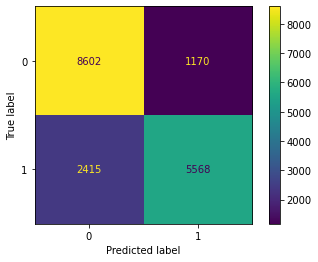

0.7980850464657843
0.7920116906678369
0.8035756445697013
0.7888761546038094
              precision    recall  f1-score   support

           0       0.78      0.88      0.83      9772
           1       0.83      0.70      0.76      7983

    accuracy                           0.80     17755
   macro avg       0.80      0.79      0.79     17755
weighted avg       0.80      0.80      0.80     17755

0.7888761546038093


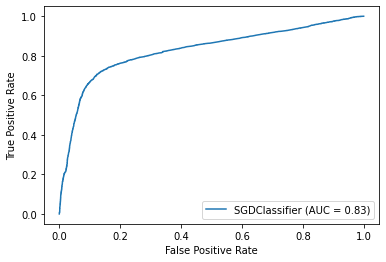

In [ ]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,accuracy_score ,f1_score, precision_score, recall_score,classification_report, plot_roc_curve,roc_auc_score
cm = confusion_matrix(y_test, y_pred4)
print(cm)
plot_confusion_matrix(classifier4,x_test,y_test,values_format='d')
plt.show()
print(accuracy_score(y_test, y_pred4))
print(f1_score(y_test, y_pred4,average='macro'))
print(precision_score(y_test,y_pred4,average='macro'))
print(recall_score(y_test,y_pred4,average='macro'))
print(classification_report(y_test, y_pred4))
print(roc_auc_score(y_test,y_pred4,average='macro'))

plot_roc_curve(classifier4,x_test,y_test)
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
classifier6=DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier6.fit(x_train, y_train)
y_pred6=classifier6.predict(x_test)

[[9555  217]
 [ 386 7597]]


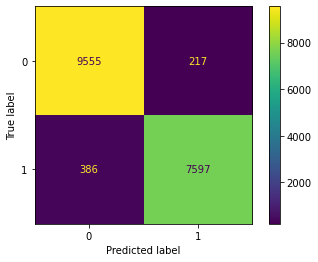

0.9660377358490566
0.9656196218867932
0.966700120163791
0.9647204733410935
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      9772
           1       0.97      0.95      0.96      7983

    accuracy                           0.97     17755
   macro avg       0.97      0.96      0.97     17755
weighted avg       0.97      0.97      0.97     17755

0.9647204733410933


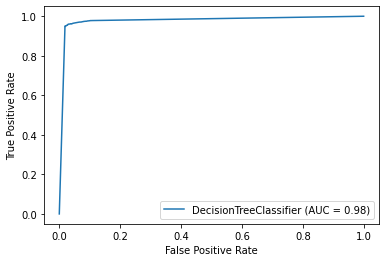

In [ ]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,accuracy_score ,f1_score, precision_score, recall_score,classification_report, plot_roc_curve,roc_auc_score
cm = confusion_matrix(y_test, y_pred6)
print(cm)
plot_confusion_matrix(classifier6,x_test,y_test,values_format='d')
plt.show()
print(accuracy_score(y_test, y_pred6))
print(f1_score(y_test, y_pred6,average='macro'))
print(precision_score(y_test,y_pred6,average='macro'))
print(recall_score(y_test,y_pred6,average='macro'))
print(classification_report(y_test, y_pred6))
print(roc_auc_score(y_test,y_pred6,average='macro'))

plot_roc_curve(classifier6,x_test,y_test)
plt.show()